In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,cohen_kappa_score
import pandas as pd




In [44]:
df = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_2/B2_Annotations-Boda.csv')
df2 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_2/B2_Annotations-Tim.csv')
df3 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_2/B2_Annotations-Prof. Ted.csv')
# df3 = None

In [45]:
column1 = ['human_actionability', 'human_specificity', 'human_verifiability','human_politeness']


In [46]:
num_rows_with_values = len(df.dropna(subset=column1))
print(num_rows_with_values)
num_rows_with_values = len(df2.dropna(subset=column1[:-1]))
print(num_rows_with_values)
num_rows_with_values = len(df3.dropna(subset=column1))
print(num_rows_with_values)

49
40
50


In [47]:
# ########3 Merge 0 labels with 1
# for col in column1:
#     df[col] = df[col].replace(0, 1).replace('0', 1)
#     df2[col] = df2[col].replace(0, 1).replace('0', 1)
#     df3[col] = df3[col].replace(0, 1).replace('0', 1)

In [48]:
# start from 39 row 
# df = df.iloc[39:]
# for col in column1:
#     print(df3.iloc[37:][col].value_counts())

In [49]:

# annotator_1_column = ['human_actionability', 'human_specificity', 'human_verifiability']

# annotator_1 = {}
# annotator_2 = {}
# for i in range(len(column1)):
#     # mini_df = df[[column1[i],column2[i]]].dropna()
#     mini_df1 = df3[[column1[i]]]
#     mini_df2 = df2[[column1[i]]]
#     # mini_df1 = mini_df1.merge(mini_df2)
#     mini_df1[column1[i] + '_2'] = mini_df2[column1[i]]
#     mini_df = mini_df1.dropna()



#     # print(mini_df.shape)
#     # print(mini_df)
#     annotator_1[column1[i].split('_')[1]] = []
#     annotator_2[column1[i].split('_')[1]] = []

#     column_names = [column1[i] , column1[i] + '_2']
#     for x,y in zip(mini_df[column_names[0]], mini_df[column_names[1]]):
#         x = str(int(x))
#         y = str(int(y))
#         if x in ['0','1', '-1'] and y in ['0','1', '-1']:
#             annotator_1[column1[i].split('_')[1]].append(x)
#             annotator_2[column1[i].split('_')[1]].append(y)
#         else:
#             print(x,y)


In [50]:
# for x,y in zip(annotator_1['specificity'],annotator_2['specificity']):
#     print(x,y)

# print(f" Kappa Score: {cohen_kappa_score(tim['specificity'], boda['specificity'])}")

In [51]:
# for key in annotator_1:
#     print(f'Agreement Statistics for {key}')
#     print(f' Total number of samples: {len(annotator_1[key])}')
#     print(f' F1 Score: {f1_score(annotator_1[key], annotator_2[key], average="micro"):.2f}')
#     print(f' Kappa Score: {cohen_kappa_score(annotator_1[key], annotator_2[key]):.2f}')
#     print(f' Linear Kappa Score: {cohen_kappa_score(annotator_1[key], annotator_2[key], weights="linear"):.2f}')
#     print(f' Quadratic Kappa Score: {cohen_kappa_score(annotator_1[key], annotator_2[key], weights="quadratic"):.2f}')

#     print('-' * 50)

# print('=' * 50)

In [52]:
columns_to_plot = ['human_actionability', 'human_specificity', 'human_verifiability']

# Create a dictionary to store the data for each aspect
aspect_data_filtered = {aspect: {'Boda': [], 'Tim': [], 'Ted': []} for aspect in columns_to_plot}

# Iterate over each aspect
for aspect in columns_to_plot:

    ## make a mini  combined dataframe with the aspect column from each annotator
    mini_df = pd.concat([df[aspect], df2[aspect], df3[aspect]], axis=1).dropna()
    mini_df.columns = ['Boda', 'Tim', 'Ted']

    print(len(mini_df))

    ## iterate over rows in all three dataframes
    for i in range(len(mini_df)):
        # print(df.iloc[i][aspect])
        
        x = str(int(mini_df.iloc[i]['Boda']))
        y = str(int(mini_df.iloc[i]['Tim']))
        z = str(int(mini_df.iloc[i]['Ted']))
        
        if x in ['0','1', '-1'] and y in ['0','1', '-1'] and z in ['0','1', '-1']:
            aspect_data_filtered[aspect]['Boda'].append(x)
            aspect_data_filtered[aspect]['Tim'].append(y)
            aspect_data_filtered[aspect]['Ted'].append(z)
    

44
43
41


In [53]:
for x,y in zip(aspect_data_filtered['human_specificity']['Boda'],aspect_data_filtered['human_specificity']['Tim']):
    print(x,y)

1 1
0 0
1 1
-1 0
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
-1 0
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 -1
1 1
1 1
1 0
1 0
1 0
1 1
1 1
1 1
0 0
1 1
1 0
-1 -1
-1 0
1 1
-1 1
1 1
0 -1


In [59]:
annotator_1 = 'Tim'
annotator_2 = 'Boda'

for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    ################# Remove the samples where the annotators disagree on human_actionability #################
    ignore_idecies = []
    if aspect != 'human_actionability':
        for i in range(len(aspect_data_filtered['human_actionability'][annotator_1])):
            if aspect_data_filtered['human_actionability'][annotator_1][i] != aspect_data_filtered['human_actionability'][annotator_2][i]:
                ignore_idecies.append(i)      
    assert len(annotator1_data) == len(annotator2_data)
    annotator1_data = [i for j, i in enumerate(annotator1_data) if j not in ignore_idecies]
    annotator2_data = [i for j, i in enumerate(annotator2_data) if j not in ignore_idecies]
    assert len(annotator1_data) == len(annotator2_data)
    ############################################################################################################

    print(f'Agreement Statistics for {aspect.split("_")[1]}')
    print(f' Total number of samples: {len(annotator1_data)}')
    print(f' F1 Score: {f1_score(annotator1_data,annotator2_data, average="micro"):.2f}')
    print(f' Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data):.2f}')
    print(f' Linear Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="linear"):.2f}')
    print(f' Quadratic Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="quadratic"):.2f}')
    print('-' * 50)

print('=' * 50)

Agreement Statistics for actionability
 Total number of samples: 44
 F1 Score: 0.64
 Kappa Score: 0.38
 Linear Kappa Score: 0.46
 Quadratic Kappa Score: 0.54
--------------------------------------------------
Agreement Statistics for specificity
 Total number of samples: 28
 F1 Score: 0.68
 Kappa Score: 0.15
 Linear Kappa Score: 0.22
 Quadratic Kappa Score: 0.31
--------------------------------------------------
Agreement Statistics for verifiability
 Total number of samples: 26
 F1 Score: 0.73
 Kappa Score: 0.56
 Linear Kappa Score: 0.61
 Quadratic Kappa Score: 0.65
--------------------------------------------------


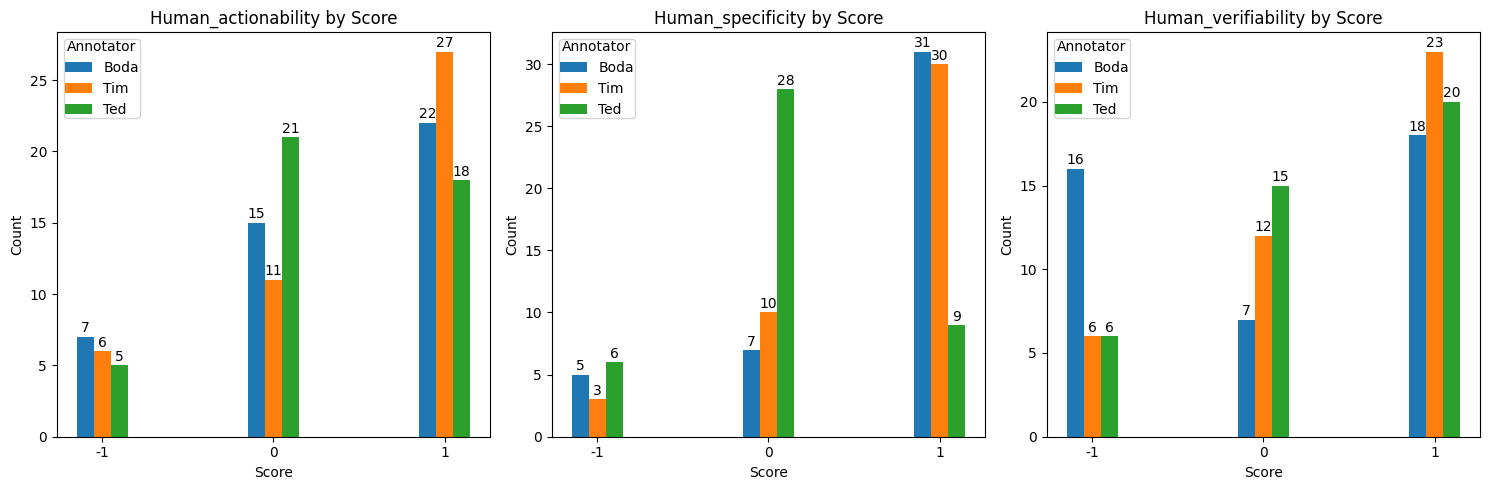

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Redefine data to fit the updated chart structure
# Data is now organized by scores for each aspect

columns_to_plot = ['human_actionability', 'human_specificity', 'human_verifiability']
annotators = ['Boda', 'Tim', 'Ted']

# Create chart with separated scores for each aspect
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define score categories for consistent plotting
scores = [-1, 0, 1]
x = np.arange(len(scores))  # Score categories

for idx, aspect in enumerate(columns_to_plot):
    ax = axes[idx]
    # Offset position for each annotator
    bar_width = 0.1
    for i, annotator in enumerate(annotators):
        counts = [aspect_data_filtered[aspect][annotator].count(str(score)) for score in scores]
        
        # Plot bars for each annotator
        bars = ax.bar(x + i * bar_width, counts, width=bar_width, label=annotator)
        
        # Annotate each bar with the count value
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.1,  # Adjust this value for placement above bars
                int(yval), 
                ha='center', 
                va='bottom'
            )

    ax.set_title(f'{aspect.capitalize()} by Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(scores)
    ax.legend(title='Annotator', borderpad=0.05)

plt.tight_layout()
plt.show()
